## PRACTICAL 7: TEXT MINING AND EXPLORATORY DATA ANALYSIS##

## Text data Cleaning

**1. Removing anomalies (stop words, punctuation, special characters)**

In [7]:
!pip install nltk
!pip install re
!pip install spacy


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [8]:
#Importing necessary library
import pandas as pd
import numpy as np
import nltk
import re
import spacy
import nltk.corpus# sample text for performing tokenization
from nltk.tokenize import word_tokenize #for tokenizing

In [9]:
text = "In Uganda they drive on the left-hand side of the road."
#View 
text

'In Uganda they drive on the left-hand side of the road.'

In [12]:
import re
# removing all the special characters
# Just a template to show how it can be done Selectively
textclean = re.sub(r'[?|$|.|!]',r' ',text)

# remove everything which is not Alphabets
cleantext = re.sub(r'[^a-z A-Z]',r' ',text)  

# Convert the whole text to lowercase
cleantext = cleantext.lower()     

# Delete any word which is less than 3-characters mostly those are stopwords
cleantext= re.sub(r'\b\w{1,3}\b', ' ', cleantext)

# Strip off extra spaces in the text
cleantext= re.sub(r' +', ' ', cleantext)

**2. Plot word cloud**

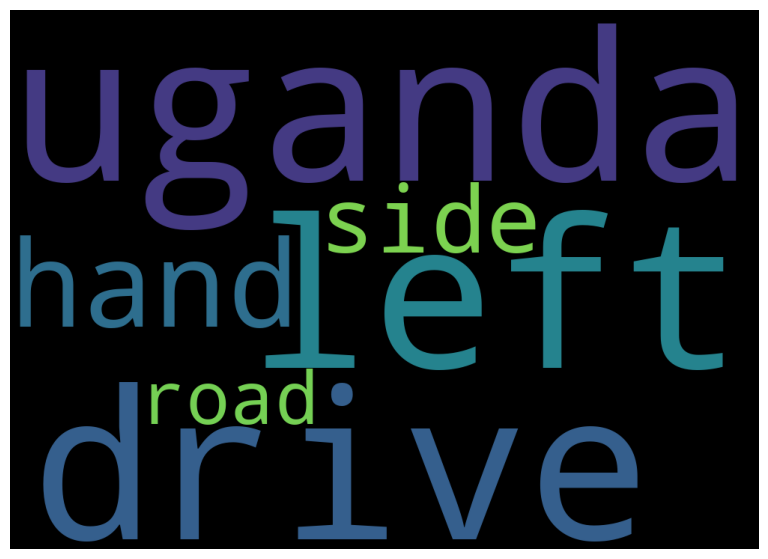

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['in','on','the','of']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(cleantext)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

**2. Lemmatizing and Stemming**

In [15]:
#Stemming using PotterStemmer
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem("waiting")

'wait'

In [17]:
# Checking for the list of words
# Checking for the list of words
stm = ["waited", "waiting", "waits"]
for word in stm :
    print(word+ ":" +pst.stem(word))

waited:wait
waiting:wait
waits:wait


In [21]:
# Importing LancasterStemmer from nltk
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
stm = ["rocks", "corpora"]
for word in stm :
  print(word+ ":" +lst.stem(word))

rocks:rock
corpora:corpor


In [20]:
 # Importing Lemmatizer library from nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


**3. Tokenization and Part of speech tagging (POS)**
- Word tokenize-"word", "tokenize" (Quickly training the model, new words make the model struggle to learn)

- Character tokenize-"w", "or" "dtk" (Slower to train the model, overcomes new/unusual words)

In [ ]:
#Tokenizing


**Lowercase and remove punctuation**

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Working with real Data</p>

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Word Cloud
from wordcloud import WordCloud
# from textacy import preprocessing
from nltk.stem.snowball import SnowballStemmer #For text stemming(works with English, Russian, Danish, French, Finnish, German, Italian etc)
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential #tensorflow for ML and NLP
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

2024-11-14 15:43:39.469050: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**A. Load data**

In [23]:
# Load Emotions Data 
df = pd.read_csv("Emotions_data.csv")
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


**B. Basic data exploration**

In [24]:
# Shape Of Data 
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (416809, 3)


In [25]:
#Check for missing data
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [26]:
#Check for duplicates
df.duplicated().sum()

0

**C. Data pre-processing**

In [27]:
# Rename Columns 
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
# Dropping the Index Colums
df.drop('Unnamed: 0',axis=1,inplace=True)
#view result
df

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


**D. Visually explore data**

In [28]:
# Rename the Labels also {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
df['Label'] = df['Label'].replace(0,'Sadness')
df['Label'] = df['Label'].replace(1,'Joy')
df['Label'] = df['Label'].replace(2,'Love')
df['Label'] = df['Label'].replace(3,'Anger')
df['Label'] = df['Label'].replace(4,'Fear')
df['Label'] = df['Label'].replace(5,'Surprise')

/var/folders/fz/73x0k3yj55b9_g8mt4krpwr80000gn/T/ipykernel_1371/1845043233.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset =

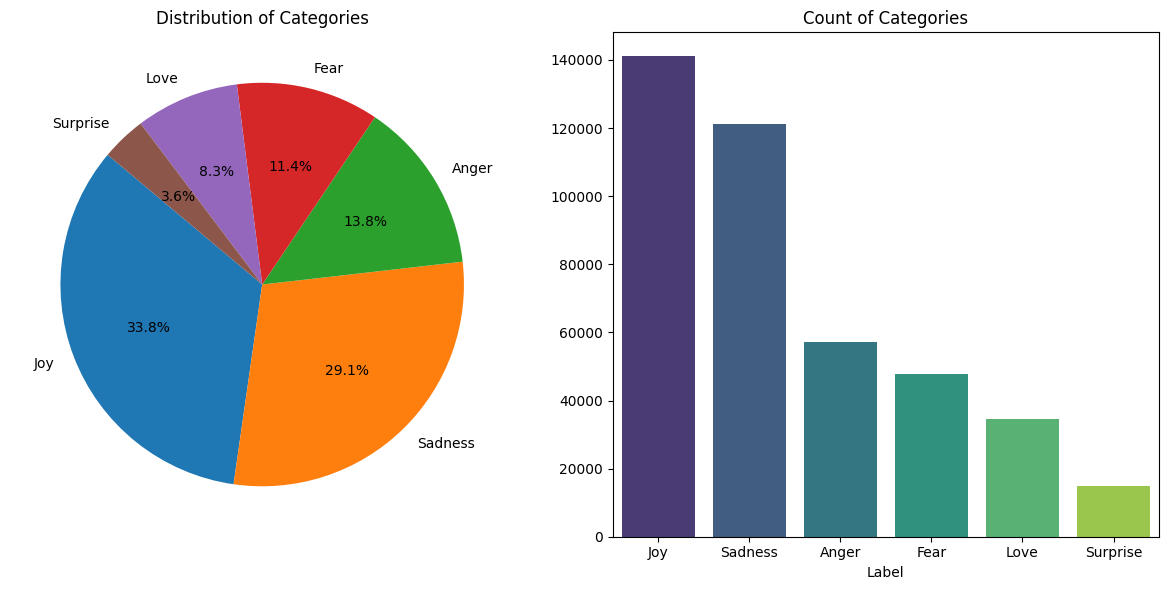

In [29]:
# Value Count Of Labels
count = df['Label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The majority of the texts are joyful, followed by sadness.

**ii. Visualising using a word cloud**

In [30]:
# Make Seperate Data Set to Visualize text 
# Sadness
df_sadness = df[df['Label']=='Sadness']
# Joy
df_joy = df[df['Label']=='Joy']
# Love
df_love = df[df['Label']=='Love']
# Anger
df_anger = df[df['Label']=='Anger']
# Fear
df_fear = df[df['Label']=='Fear']
# Surprise
df_surprise = df[df['Label']=='Surprise']

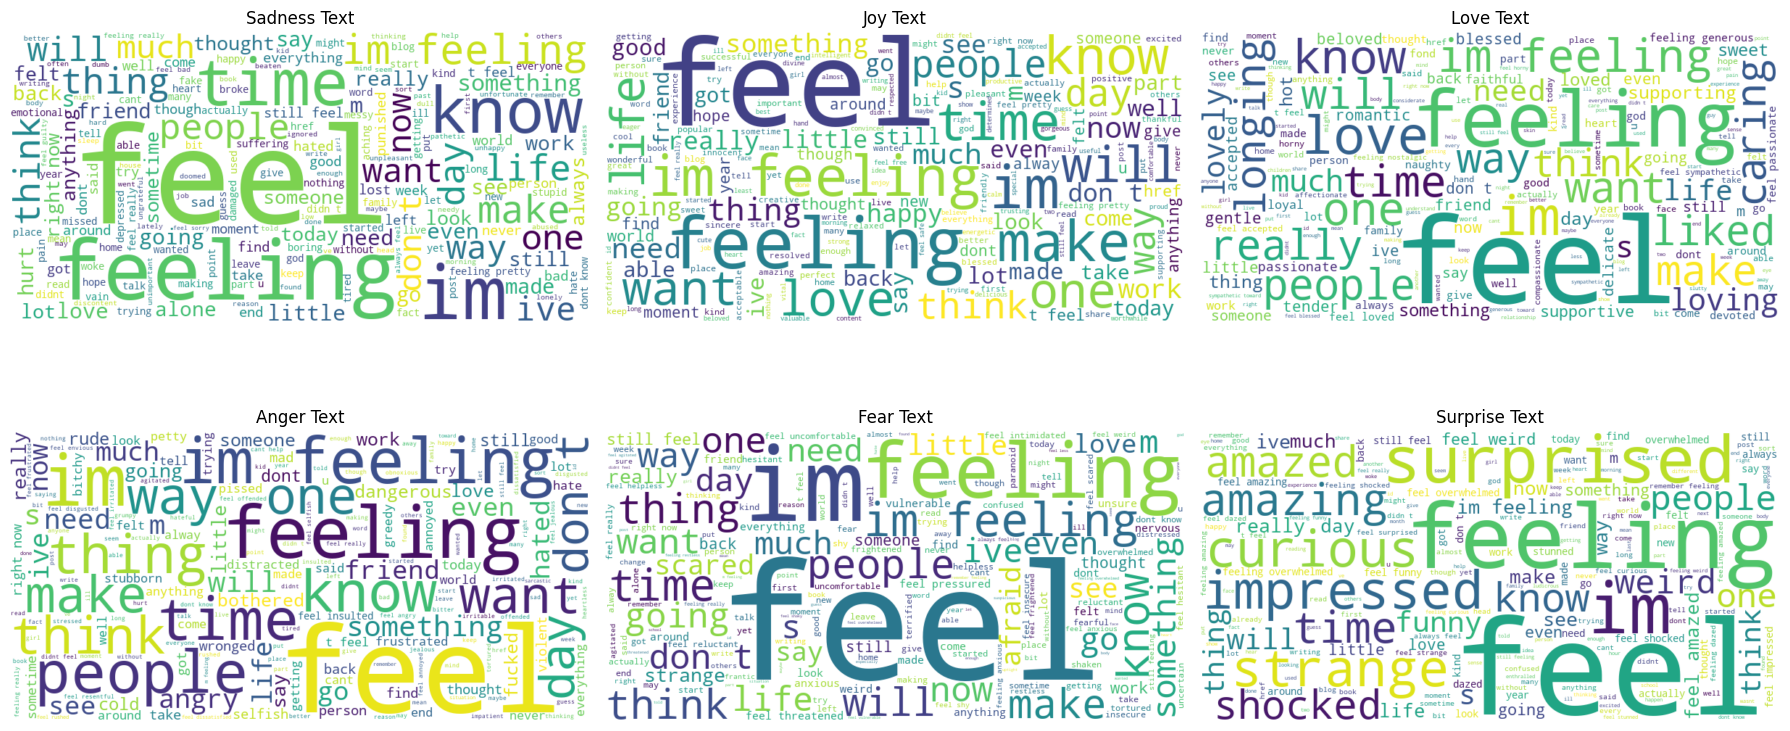

In [31]:
# Combine text from different categories
combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

# Create word clouds
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

All the categories of texts have a high frequency of "feel" and "feeling" as the key words used.

In [32]:
#Remove the label encoding prior to ML
# Now Unrename Labels again
df['Label'] = df['Label'].replace('Sadness',0)
df['Label'] = df['Label'].replace('Joy',1)
df['Label'] = df['Label'].replace('Love',2)
df['Label'] = df['Label'].replace('Anger',3)
df['Label'] = df['Label'].replace('Fear',4)
df['Label'] = df['Label'].replace('Surprise',5)

/var/folders/fz/73x0k3yj55b9_g8mt4krpwr80000gn/T/ipykernel_1371/579115107.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace('Surprise',5)


**E. Text data pre-processing for ML**
1. **Step 1: Remove URLs:** Uses a regular expression to remove URLs from the text data.

2. **Step 2: Remove special characters and punctuation:** Uses a regular expression to remove any special characters and punctuation marks from the text.

3. **Step 3: Remove extra whitespaces:** Uses a regular expression to remove extra whitespaces and replace them with a single space.

4. **Step 4: Remove numeric values:** Uses a regular expression to remove any numeric values from the text.

5. **Step 6: Lowercasing:** Converts all text to lowercase to ensure consistency.

6. **Step 8: Remove stop words:** Removes common English stop words, such as "the," "is," "and," etc., using NLTK's stopwords list.

7. **Step 9: Remove non-alphanumeric characters:** Uses a regular expression to remove any non-alphanumeric characters from the text.

***Overall, these preprocessing steps help clean and normalize the text data, removing noise and ensuring that the data is consistent and suitable for further analysis or modeling tasks.***

In [33]:
#Import libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ernestbalzer/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ernestbalzer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**i. Remove URLS**

In [34]:
#Remove URLs from the "Text" variable
df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


**ii. Remove special characters and punctuation**

In [35]:
# Remove special characters and punctuation from the "Text" variable
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


**iii. Remove extra white spaces and numeric values**

In [36]:
# Remove extra whitespaces from variable "text"
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [37]:
# Step : 4 Remove numeric values
df['Text'] = df['Text'].str.replace(r'\d+', '', regex=True)

# Head
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


**iv. Lowercase text and remove stop words and non-alphabet**

In [38]:
# Step 5: Lowercasing
df['Text'] = df['Text'].str.lower()

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [39]:
# Step 6: Remove stop words
stop = stopwords.words('english')
df["Text"] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Display the first few rows of the DataFrame to verify the changes
df.head()

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


In [40]:
# Step 7: Remove non-alphanumeric characters from the 'Text' column
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Display the first few rows of the DataFrame to verify the changes
df.head()

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


Goal to classify the text
Label-target variable
text-predictor variable

**F. Split data for training and testing the ML model**
- Predictor feature is "Text"
- Target feature is "Label"

Model is trained on 70-80% of the data 
Model is tested on 20-30% of the data (accuracy, precision)
Validate the model on new data

In [41]:
X = df['Text']
y = df['Label']

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (333447,)
X_test shape: (83362,)
y_train shape: (333447,)
y_test shape: (83362,)


**G. Pre-processing data for ML analysis**

**i. Tokenizing**
- The text data in `X_train` and `X_test` is tokenized using the Tokenizer class from Keras. 
- This step converts the text data into sequences of integers, where each unique word in the dataset is assigned a unique integer index. 
- The `num_words` parameter limits the vocabulary size to 50,000 most frequent words

In [42]:
#Tokenizing
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [49]:
# Maximum Length in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 79


**ii. Padding**
- After tokenization, the sequences in `X_train` and `X_test` are padded to ensure uniform length. 
- This is achieved using the pad_sequences function, which pads sequences with zeros to make them all of the same length (`maxlen`). 
- Padding is done after the sequences to ensure that the actual content of the text is preserved.

In [50]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post',)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[   16 30399    69 ...     0     0     0]
 [  268     5   723 ...     0     0     0]
 [    1    44   721 ...     0     0     0]
 ...
 [    1   591     0 ...     0     0     0]
 [    4    15   473 ...     0     0     0]
 [    1   147  1739 ...     0     0     0]]

X_test_padded:
[[  120    39   169 ...     0     0     0]
 [ 3033 14468   785 ...     0     0     0]
 [  188   303    48 ...     0     0     0]
 ...
 [  841   271  1955 ...     0     0     0]
 [ 1907  7254   634 ...     0     0     0]
 [   82     1   400 ...     0     0     0]]


**iii. Setting vocabulary input size**
- The set of unique words used in the text `corpus` is referred to as the vocabulary. 
- `Corpus` is how many words one is knowleadgeable in to be considered proficient in a language 
- When processing raw text for NLP, everything is done around the vocabulary. 
- When the text corpus is large and you need to limit the vocabulary size to increase training speed or prevent overfitting on infrequent words

In [51]:
# Embedding Input Size / Vocabulary Size 
input_Size = np.max(X_train_padded) + 1
input_Size

50000

**H. Model Building**
- Build a model that can group the texts and make predictions on how to group incoming/future/past texts.
- Using a Bidirectional Gated Recurrent Units (GRUs) model is essential in natural language processing and sequence modeling tasks due to their ability to capture bidirectional dependencies in sequential data (present, past, future text classification)
- GRUs are a form of Recurrent Neural Network (RNN) which are deep-learning models
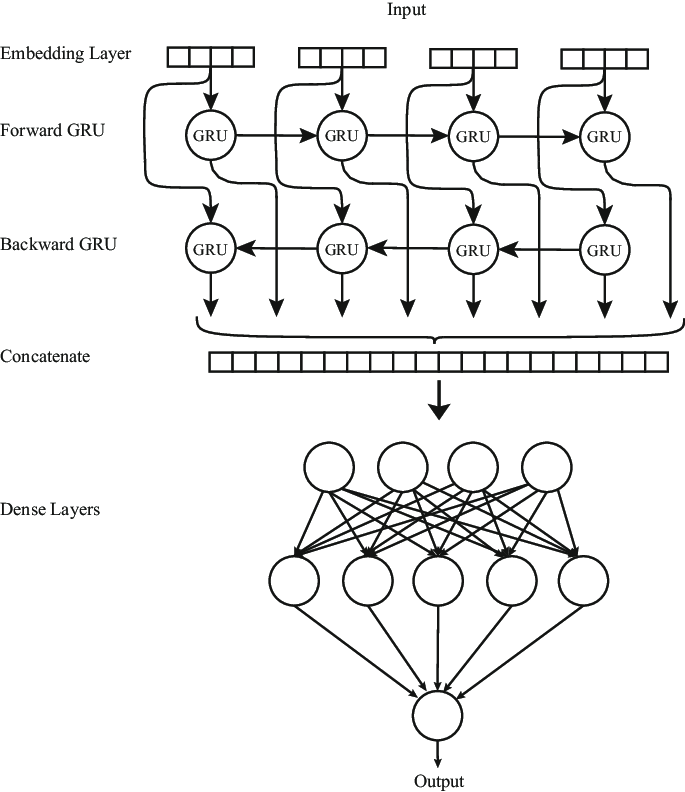

**About the model code:**
- `model = Sequential()` initializes a sequential model, allowing layers to be added in sequence.

- The `Embedding` layer is added to the model. It is responsible for converting input integers (each representing a word index) into dense vectors of fixed size. This layer is essential for handling textual data.

- `Dropout` layer with a dropout rate of 0.5 is added next. Dropout layers help prevent overfitting by randomly setting a fraction of input units to zero during training.

- Two Bidirectional GRU layers are added sequentially. Bidirectional layers process the input sequence in both directions, allowing the model to capture information from past and future states. The `return_sequences=True` argument ensures that the output sequences are returned for each timestep.

- `BatchNormalization` layer is added to normalize the activations of the previous layer at each batch, aiding in faster and more stable training.

- Another Bidirectional GRU layer is added to capture bidirectional dependencies more effectively.

- The final `Dense` layer with 6 units (for 6 classes/labels) and softmax activation function is added as the output layer for multi-class classification.

- The model is compiled with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the evaluation metric.

- `model.summary()` prints the summary of the model, displaying the architecture and parameter details.

In [52]:
#Import libraries
from keras.models import Sequential 
from keras.layers import Embedding,Bidirectional, SimpleRNN, Dense